# Challenge: We've all experienced the annoyance of receiving spam emails, those unsolicited and often misleading messages sent to a large number of recipients. Some spam emails may contain cryptic content, scams, or even pose a significant threat with phishing attempts.

Project Objective: Your mission is to develop an email spam detection system using Python. The goal is to employ machine learning techniques to train this system to accurately distinguish between spam and legitimate (non-spam) emails. Let's dive into this exciting project!

# Import the libraries.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')

2.load the data set from csv file and used encodindg as 'latin-1'

# 2. Load the data by using encoding as 'Latin-1'

In [2]:

Spam_data = pd.read_csv(r'C:\Users\Fast Computers\Downloads\spam (1).csv',encoding='latin-1')



In [3]:
Spam_data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
Spam_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
Spam_data.shape

(5572, 5)

In [6]:
Spam_data.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [7]:
Spam_data.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [8]:
#lets delete Unnamed : 2 , Unnamed : 3 and Unnamed : 4 column because they are having zero values in almost entire column.

column_to_delete=[name for name in Spam_data.columns if name.startswith('Unnamed')]
Spam_data.drop(columns=column_to_delete,inplace=True)

In [9]:
# print duplicated rows in the data
Spam_data.duplicated().sum()

403

In [10]:
# drop duplicated rows
Spam_data.drop_duplicates(inplace=True)

In [11]:
Spam_data

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [12]:
#rename v1 column to Label and v2 column to Text
Spam_data.rename(columns=dict({"v1":"Label","v2":"Text"}),inplace=True)
Spam_data

,Label,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [13]:
# after deleting and renaming columns,print last five rows of data.
Spam_data.tail()

,Label,Text
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [14]:
# functions to map target with 0 and 1.
Spam_data['Label'] = Spam_data['Label'].map({"ham": 0, "spam": 1})
Spam_data.head()


,Label,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


# Cleaning the text data

In [15]:
#cleaning the text data
from bs4 import BeautifulSoup
import re

def clean_text(text):
    text = BeautifulSoup(text, "html.parser").get_text()  # Remove HTML tags
    text = re.sub(r'[^a-zA-Z]', ' ', text)  # Remove special characters and numbers
    return text


Tokenization:

In [16]:
# tokenization
from nltk.tokenize import word_tokenize

def tokenize_text(text):
    tokens = word_tokenize(text)
    return tokens


#Text Normalization:

Normalize the text by converting it to lowercase, removing stopwords, and performing stemming or lemmatization. This helps reduce dimensionality and makes the text more consistent.

In [17]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

def normalize_text(tokens):
    stop_words = set(stopwords.words("english"))
    stemmer = PorterStemmer()
    normalized_tokens = [stemmer.stem(token.lower()) for token in tokens if token.lower() not in stop_words]
    return normalized_tokens


# Basic EDA

1.Class Distribution

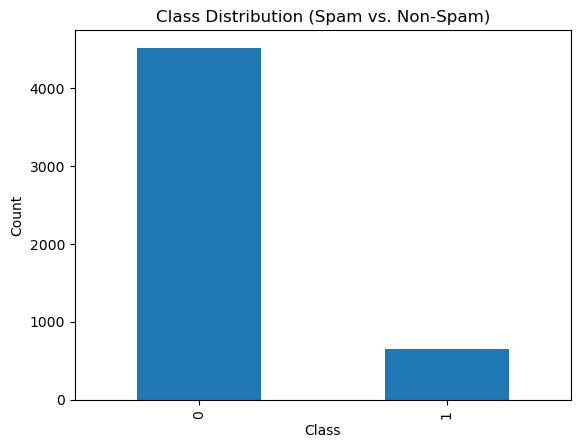

In [18]:
import matplotlib.pyplot as plt

class_distribution = Spam_data['Label'].value_counts()
class_distribution.plot(kind='bar')
plt.title('Class Distribution (Spam vs. Non-Spam)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


As you see to the graph the percentage of ham is too high (87.37%) as compare to spam messages percentage. so the data is imbalance

2.Text Length Analysis:

Analyze the distribution of text message lengths to see if there are any patterns or differences between spam and non-spam emails.

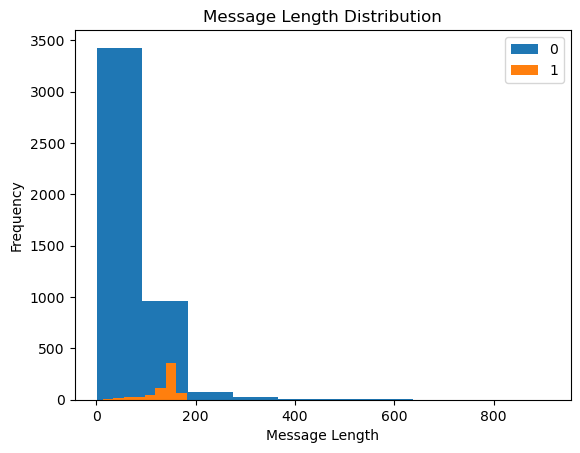

In [19]:
Spam_data['message_length'] = Spam_data['Text'].apply(len)
Spam_data.groupby('Label')['message_length'].plot(kind='hist', legend=True)
plt.title('Message Length Distribution')
plt.xlabel('Message Length')
plt.ylabel('Frequency')
plt.show()


3.Word Frequency Analysis:

Examine the most common words in both spam and non-spam emails. This can provide insights into the language used in each category.

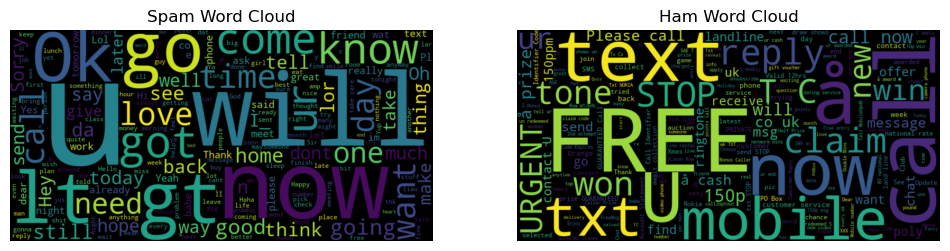

In [20]:
from wordcloud import WordCloud

spam_words = ' '.join(Spam_data[Spam_data['Label'] == 0]['Text'])
non_spam_words = ' '.join(Spam_data[Spam_data['Label'] == 1]['Text'])

spam_wordcloud = WordCloud(width=800, height=400).generate(spam_words)
non_spam_wordcloud = WordCloud(width=800, height=400).generate(non_spam_words)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.title('Spam Word Cloud')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(non_spam_wordcloud, interpolation='bilinear')
plt.title('Ham Word Cloud')
plt.axis('off')
plt.show()



In [21]:
# Filter the DataFrame for spam messages (label 1)
spam_messages = Spam_data[Spam_data['Label'] == 1]

# Combine all spam messages into a single string
spam_text = ' '.join(spam_messages['Text'])

# Tokenize the combined spam text into words
spam_words = spam_text.split()

# Find unique words and their lengths
unique_words = set(spam_words)
word_lengths = {word: len(word) for word in unique_words}

# Print the unique words and their lengths
for word, length in word_lengths.items():
    print(f'Word: {word}, Length: {length}')


Word: community., Length: 10
Word: fone, Length: 4
Word: become, Length: 6
Word: AGE, Length: 3
Word: competition, Length: 11
Word: MATCHED, Length: 7
Word: auction, Length: 7
Word: last, Length: 4
Word: AOM,, Length: 4
Word: filthyguys., Length: 11
Word: Cash., Length: 5
Word: 09058094454, Length: 11
Word: play?, Length: 5
Word: SPJanuary, Length: 9
Word: conditions,, Length: 11
Word: Hello, Length: 5
Word: 08717898035., Length: 12
Word: 09071517866, Length: 11
Word: great!, Length: 6
Word: &, Length: 1
Word: Stop?, Length: 5
Word: email, Length: 5
Word: waiting, Length: 7
Word: 12, Length: 2
Word: Go, Length: 2
Word: enough, Length: 6
Word: sign, Length: 4
Word: outbid, Length: 6
Word: costå£3.75max, Length: 13
Word: Village, Length: 7
Word: GO, Length: 2
Word: special, Length: 7
Word: Get, Length: 3
Word: or, Length: 2
Word: Goto, Length: 4
Word: å£5, Length: 3
Word: cash-balance, Length: 12
Word: WINNER!!, Length: 8
Word: you!, Length: 4
Word: rply, Length: 4
Word: Boys., Length: 5

In [22]:
# Filter the DataFrame for ham messages (label 0)
spam_messages = Spam_data[Spam_data['Label'] == 0]

# Combine all spam messages into a single string
spam_text = ' '.join(spam_messages['Text'])

# Tokenize the combined spam text into words
spam_words = spam_text.split()

# Find unique words and their lengths
unique_words = set(spam_words)
word_lengths = {word: len(word) for word in unique_words}

# Print the unique words and their lengths
for word, length in word_lengths.items():
    print(f'Word: {word}, Length: {length}')

Word: financial, Length: 9
Word: medicine., Length: 9
Word: sayin, Length: 5
Word: competition, Length: 11
Word: dryer, Length: 5
Word: reset, Length: 5
Word: number., Length: 7
Word: welp?, Length: 5
Word: intend, Length: 6
Word: nammanna, Length: 8
Word: parkin, Length: 6
Word: Sry, Length: 3
Word: great!, Length: 6
Word: Brdget, Length: 6
Word: &, Length: 1
Word: Boy, Length: 3
Word: Teacher, Length: 7
Word: tuth, Length: 4
Word: errors, Length: 6
Word: Sez,, Length: 4
Word: shorter, Length: 7
Word: sign, Length: 4
Word: wa., Length: 3
Word: here,, Length: 5
Word: GO, Length: 2
Word: before.went, Length: 11
Word: feb-april, Length: 9
Word: or, Length: 2
Word: real., Length: 5
Word: somewhat, Length: 8
Word: Babe!, Length: 5
Word: 2.15, Length: 4
Word: Okey, Length: 4
Word: football, Length: 8
Word: sweater, Length: 7
Word: 5.Terror, Length: 8
Word: dat?, Length: 4
Word: willing, Length: 7
Word: Might, Length: 5
Word: unsold., Length: 7
Word: WeLL, Length: 4
Word: stamps, Length: 6
W

In [23]:
values = Spam_data['Label'].value_counts()
total = values.sum()

percentage_0 = (values[0] /total) * 100
percentage_1 = (values[1]/ total) *100

print('percentage of 0 :' ,percentage_0)
print('percentage of 1 :' ,percentage_1)

percentage of 0 : 87.3669955503966
percentage of 1 : 12.633004449603405


# Splitting and training of data

In [24]:
from sklearn.model_selection import train_test_split

# Assuming 'text' is your feature column and 'label' is your target column
X = Spam_data['Text']
y = Spam_data['Label']

# Split the data into training and testing sets (70-80 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting sets
print("Training set - Features:", X_train.shape)
print("Testing set - Features:", X_test.shape)
print("Training set - Labels:", y_train.shape)
print("Testing set - Labels:", y_test.shape)


Training set - Features: (4135,)
Testing set - Features: (1034,)
Training set - Labels: (4135,)
Testing set - Labels: (1034,)


# Feature Extraction

In [25]:
# Feature extraction using TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [26]:
# Train a Naive Bayes classifier
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

MultinomialNB()

In [27]:
# Make predictions
y_pred = model.predict(X_test_tfidf)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9555125725338491
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       889
           1       1.00      0.68      0.81       145

    accuracy                           0.96      1034
   macro avg       0.98      0.84      0.89      1034
weighted avg       0.96      0.96      0.95      1034



In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Split the data into training and testing sets (70-80 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the text data using TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Logistic Regression
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train_tfidf, y_train)
logistic_regression_predictions = logistic_regression.predict(X_test_tfidf)

# SVM
svm_classifier = SVC(probability=True)  # probability=True for ROC curve
svm_classifier.fit(X_train_tfidf, y_train)
svm_predictions = svm_classifier.predict(X_test_tfidf)

# Random Forest
random_forest = RandomForestClassifier()
random_forest.fit(X_train_tfidf, y_train)
random_forest_predictions = random_forest.predict(X_test_tfidf)

# Neural Network
neural_network = MLPClassifier()
neural_network.fit(X_train_tfidf, y_train)
neural_network_predictions = neural_network.predict(X_test_tfidf)

# Evaluate models
models = {'Logistic Regression': logistic_regression_predictions,
          'SVM': svm_predictions,
          'Random Forest': random_forest_predictions,
          'Neural Network': neural_network_predictions}
print(models)

{'Logistic Regression': array([0, 0, 0, ..., 1, 0, 0], dtype=int64), 'SVM': array([0, 0, 0, ..., 1, 0, 0], dtype=int64), 'Random Forest': array([0, 0, 0, ..., 1, 0, 0], dtype=int64), 'Neural Network': array([0, 0, 0, ..., 1, 0, 0], dtype=int64)}


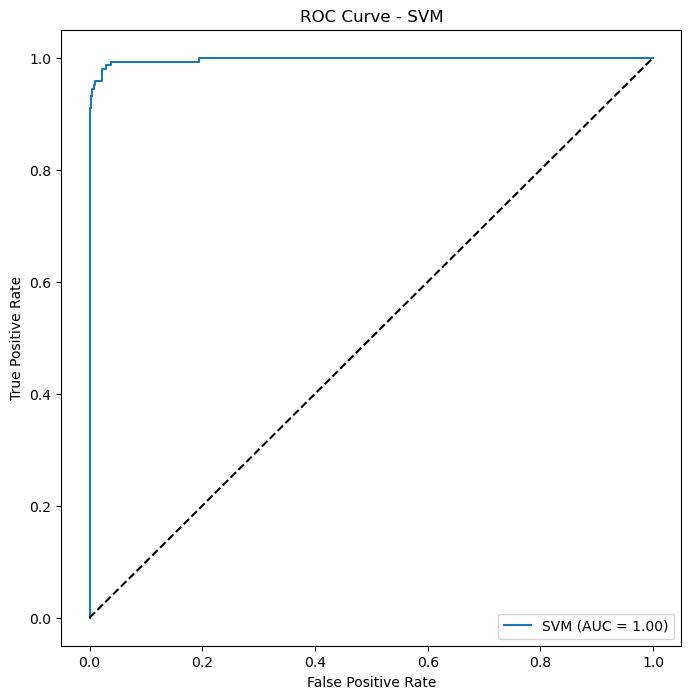

In [29]:
# ROC Curve for SVM
if hasattr(svm_classifier, "predict_proba"):
    svm_probabilities = svm_classifier.predict_proba(X_test_tfidf)[:, 1]
    fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, svm_probabilities)
    auc_svm = roc_auc_score(y_test, svm_probabilities)

    plt.figure(figsize=(8, 8))
    plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {auc_svm:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random model
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve - SVM')
    plt.legend()
    plt.show()


# Conclusion:
Support Vector Classifier (SVC)  demonstrated the highest accuracy, achieving approximately 97.58%.
Naive Bayes (NB) achieved a perfect precision score, indicating zero false positives.

# Hyperparameter Tunning

# Grid search

# Random search